# Let's get started! ⚡

In [75]:
## import Module

# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# RF Training
from sklearn.ensemble import RandomForestClassifier

# Data Reading

In [76]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [77]:
# 헤드 확인
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [78]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [79]:
# 컬럼별 타입과 Null값 확인
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

# Exploratory Data Analysis 📊🤔

## 생존여부와 데이터별 인덱스 분리

In [80]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

## 학습데이터와 테스트데이터 프레임 합치기

In [81]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

In [82]:
data.describe()

Pclass          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881138     0.498854     0.385027    33.295479
std       0.837836    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


## 결측치 채우기 위한 분석

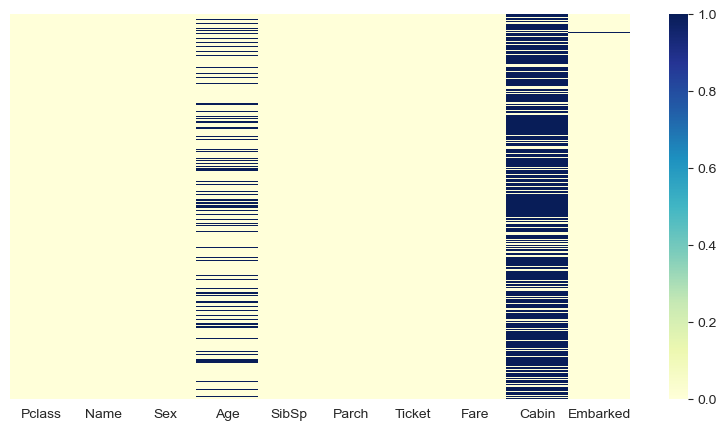

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [85]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [86]:
data[data.Embarked.isna()]

Pclass                                       Name     Sex   Age  SibSp  \
61        1                        Icard, Miss. Amelie  female  38.0      0   
829       1  Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   

     Parch  Ticket  Fare Embarked  
61       0  113572  80.0      NaN  
829      0  113572  80.0      NaN

In [87]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

Embarked
S    177
C    141
Q      3
Name: count, dtype: int64

<Axes: xlabel='Sex'>

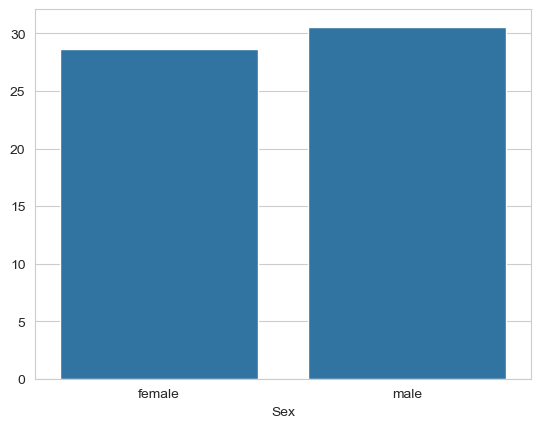

In [88]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [89]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

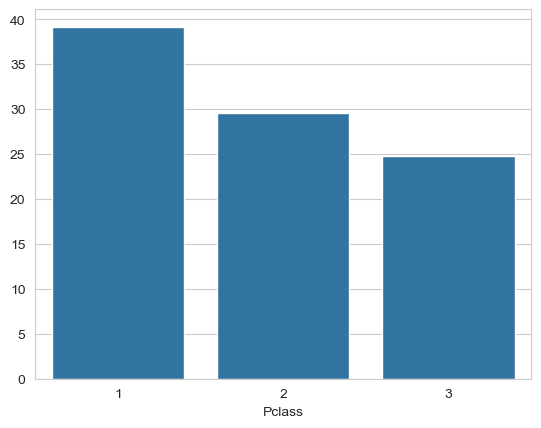

In [90]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [91]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [92]:
data[data.Fare.isna()]

Pclass                Name   Sex   Age  SibSp  Parch Ticket  Fare  \
152       3  Storey, Mr. Thomas  male  60.5      0      0   3701   NaN   

    Embarked  
152        S

<Axes: xlabel='Fare', ylabel='Count'>

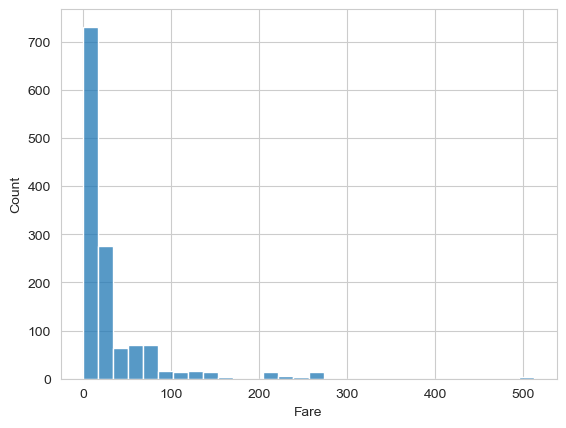

In [93]:
sns.histplot(data.Fare,bins=30)

In [94]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [95]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

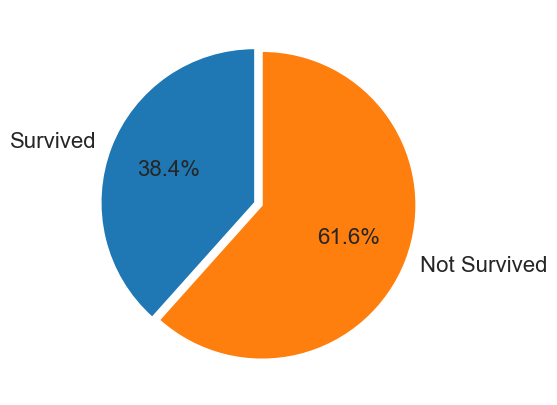

In [96]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart 
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [97]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [98]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [99]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

mean  min       max
Survived                          
0         22.117887  0.0  263.0000
1         48.395408  0.0  512.3292

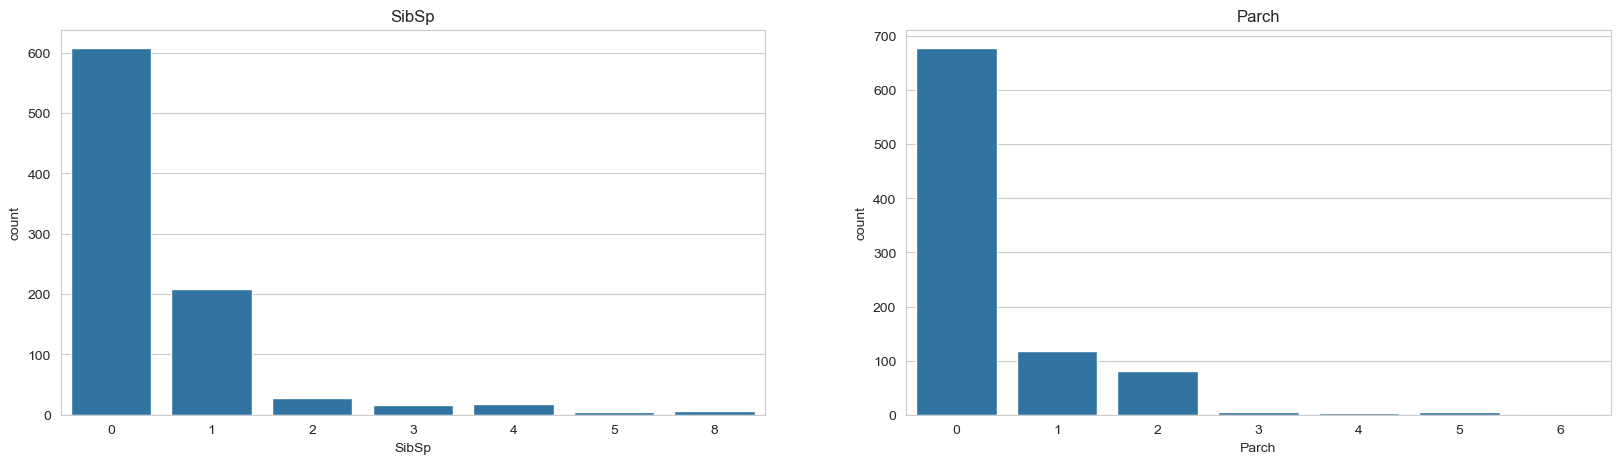

In [100]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0]) 
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [101]:
data_exp.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: count, Length: 730, dtype: int64

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

In [102]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    df1 = df_train.drop(columns='Survived')
    df = pd.concat([df1, df_test], axis=0, sort=False).reset_index(drop=True)
    df['PassengerId'] = df['PassengerId'].astype(int)
    return df

In [103]:
# 'Name' 컬럼에서 'honorific_title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'honorific_title' 생성하는 함수
def get_honorific_title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    honorific_title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if honorific_title in top4_titles:
        return honorific_title
    elif honorific_title in female_titles_to_Mrs:
        return 'Mrs'
    elif honorific_title in female_titles_to_Miss:
        return 'Miss'
    elif honorific_title in male_titles_to_Mr:
        return 'Mr'
    else:
        return honorific_title

In [104]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_honorific_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['honorific_title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['honorific_title'].isin(title_on_both_side))
    
    # 치환
    df.loc[cond_mr, 'honorific_title'] = 'Mr'
    df.loc[cond_mrs, 'honorific_title'] = 'Mrs'
    
    return df

In [105]:
# 새 피쳐로 사용할 컬럼 'honorific_title' 생성
def make_honorific_title(df=None):
    df['honorific_title'] = df['Name'].map(get_honorific_title)
    
    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_honorific_title_on_both_side(df)
    
    return df

In [106]:
# 'Surname'(성씨) 생성 후 가족별로 묶기
def make_Surname_FamilyGroup(df=None):
    df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
    surname_counts = df['Surname'].value_counts()
    df['FamilyGroup'] = df['Surname'].map(surname_counts)
    return df

In [107]:
# 'Family', 'IsAlone' 생성
def make_Family_IsAlone(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int)
    df['IsAlone'] = (df['Family'] <= 1).astype(int)
    return df

In [108]:
# 'Cabin' 컬럼 매핑
def mapping_Cabin(df=None):
    df['Cabin'].fillna('Unknown', inplace=True)
    cabin_mapping = {cabin[0]: idx for idx, cabin in enumerate(sorted(set(cabin[0] for cabin in df['Cabin'].unique())))}
    df['Cabin'] = df['Cabin'].map(lambda x: cabin_mapping[x[0]])
    return df

In [109]:
# 'TicketGroup' 컬럼 생성
def make_TicketGroup(df=None):
    df["TicketGroup"] = df["Ticket"].map(
        df["Ticket"].value_counts()
    )
    return df

In [110]:
# 'Ticket' 종류별로 묶기
def categorize_Ticket(df=None):
    def process_ticket(data):
        # 단순 숫자만 있는 티켓들 분류
        number_ticket = data[data["Ticket"].str.isdigit()].copy()
        number_ticket['Ticket'] = number_ticket['Ticket'].astype(int)
        number_ticket.loc[number_ticket['Ticket'] <= 100000, 'Ticket'] = 14
        number_ticket.loc[(number_ticket['Ticket'] > 100000) & (number_ticket['Ticket'] <= 200000), 'Ticket'] = 15
        number_ticket.loc[(number_ticket['Ticket'] > 200000) & (number_ticket['Ticket'] <= 300000), 'Ticket'] = 13
        number_ticket.loc[(number_ticket['Ticket'] > 300000) & (number_ticket['Ticket'] <= 400000), 'Ticket'] = 5
        number_ticket.loc[number_ticket['Ticket'] > 3000000, 'Ticket'] = 6
        
        # 알파벳 포함된 티켓들을 종류별로 분류
        num_alpha_ticket = data[data["Ticket"].str.contains('[^\d]', na=False)].copy()
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('A.+', na=False), 'Ticket'] = 1
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('C\.*A\.*.+', na=False), 'Ticket'] = 8
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('PC.+', na=False), 'Ticket'] = 16
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('PP.+', na=False), 'Ticket'] = 18
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('SOTON.+', na=False), 'Ticket'] = 3
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('STON.+', na=False), 'Ticket'] = 11
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('LINE.*', na=False), 'Ticket'] = 7
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('F\.C\.(C\.)*.+', na=False), 'Ticket'] = 17
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('W.+', na=False), 'Ticket'] = 4
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('C.+', na=False), 'Ticket'] = 9
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('S(\.)*C.+', na=False), 'Ticket'] = 12
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('S(\.)*O.+', na=False), 'Ticket'] = 2
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('[^\d](Fa)*(P/PP)*(S\.P)*(S\.*W)*.+', na=False), 'Ticket'] = 10
        num_alpha_ticket['Ticket'] = num_alpha_ticket['Ticket'].apply(lambda x: int(x) if pd.notna(x) else x)

        processed_data = pd.concat([number_ticket, num_alpha_ticket])

        return processed_data

    # 처리
    data_processed = process_ticket(df)
    
    # 다시 합치기
    df = df.merge(data_processed[['PassengerId', 'Ticket']], on='PassengerId', how='left')
    df = df.drop('Ticket_x', axis=1)
    
    return df

In [111]:
# 필요없는 컬럽들 드랍 함수
def drop_columns(df=None):
    # 'PassengerId' 컬럼
    df = df.drop(columns=['PassengerId'])
    
    # 'Name' 컬럼
    df = df.drop(columns=['Name'])
    
    # 'Surname' 컬럼
    df = df.drop(columns=['Surname'])
    
    # 'SibSp', 'Parch' 컬럼
    # df = df.drop(columns=['SibSp', 'Parch'])
    
    # 'Family' 컬럼
    df = df.drop(columns=['Family'])
    
    return df

## 1차 전처리 함수 모음

In [112]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)
    
    # 호칭 만들기
    df = make_honorific_title(df)
    
    # 'Surname'(성씨) 생성 후 가족별로 묶기
    df = make_Surname_FamilyGroup(df)
    
    # 'Family', 'IsAlone' 생성
    df = make_Family_IsAlone(df)
    
    # 'Cabin' 컬럼 매핑
    df = mapping_Cabin(df)
    
    # 'TicketGroup' 컬럼 생성
    df = make_TicketGroup(df)
    
    # 'Ticket' 종류별로 묶기
    df = categorize_Ticket(df)
    
    # 필요없는 컬럼 삭제
    df = drop_columns(df)
       
    return df

In [113]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

In [114]:
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare  Cabin Embarked  \
0       3    male  22.0      1      0   7.2500      8        S   
1       1  female  38.0      1      0  71.2833      2        C   
2       3  female  26.0      0      0   7.9250      8        S   
3       1  female  35.0      1      0  53.1000      2        S   
4       3    male  35.0      0      0   8.0500      8        S   

  honorific_title  FamilyGroup  IsAlone  TicketGroup  Ticket_y  
0              Mr            2        1            1         1  
1             Mrs            2        1            2        16  
2            Miss            1        1            1        11  
3             Mrs            2        1            2        15  
4              Mr            2        1            1         5

<Axes: xlabel='honorific_title'>

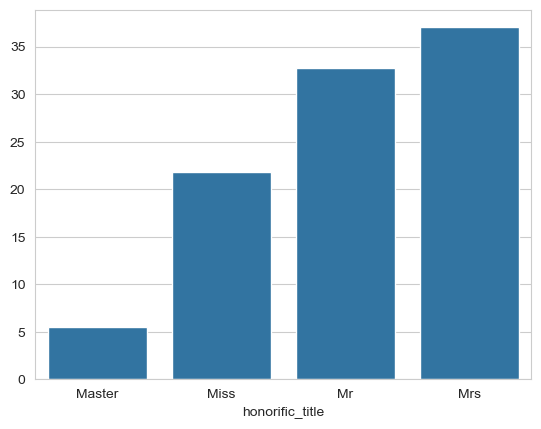

In [115]:
# 'honorific_title'에 따른 'Age' 분포 표시
sns.barplot(x=df.groupby('honorific_title')['Age'].agg(np.mean).index, y=df.groupby('honorific_title')['Age'].agg(np.mean).values)

<Axes: xlabel='Age', ylabel='honorific_title'>

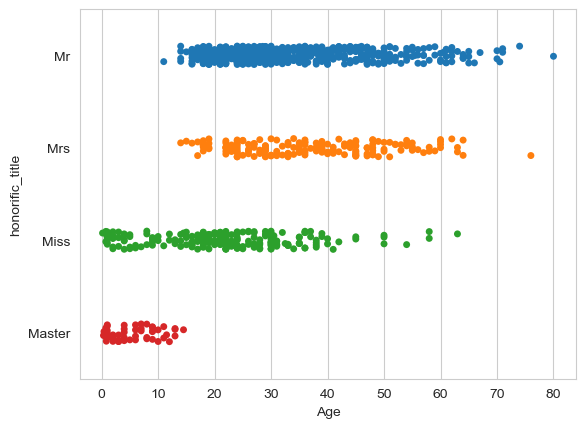

In [116]:
# Plot the distribution of Ages for each group
sns.stripplot(
      data=df
    , x='Age'
    , y='honorific_title'
    , hue='honorific_title'
)

In [117]:
df.groupby('honorific_title')['Age'].agg({'mean', 'median', 'max'})

median   max       mean
honorific_title                         
Master              4.0  14.5   5.482642
Miss               22.0  63.0  21.824366
Mr                 30.0  80.0  32.784298
Mrs                36.0  76.0  37.040000

<Axes: xlabel='Fare', ylabel='Pclass'>

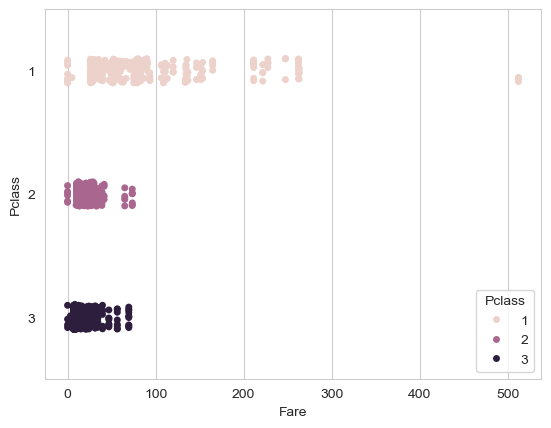

In [118]:
sns.stripplot(
      data=df
    , x='Fare'
    , y='Pclass'
    , hue='Pclass'
    , orient='h'
)

In [119]:
df.groupby('Pclass')['Fare'].agg({'mean', 'median', 'max'})

median       max       mean
Pclass                              
1       60.0000  512.3292  87.508992
2       15.0458   73.5000  21.179196
3        8.0500   69.5500  13.302889

## 2차 전처리 함수 선언

### Imputer 함수 선언

In [120]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    def fn(honorific_title=None, age=None):
        if np.isnan(age):
            if honorific_title == 'Master':
                return 5.48
            elif honorific_title == 'Miss':
                return 21.82
            elif honorific_title == 'Mr':
                return 32.78
            elif honorific_title == 'Mrs':
                return 37.04
        else:
            return age
    
    df['Age'] = df[['honorific_title', 'Age']].apply(lambda x: fn(x['honorific_title'], x['Age']),axis=1)
    df['Age'] = df['Age'].astype('int64')
    
    return df

In [121]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    def fn(pclass=None, fare=None):
        if np.isnan(fare):
            if pclass == 1:
                return 60.0
            elif pclass == 2:
                return 15.04
            elif pclass == 3:
                return 8.05
        else:
            return fare
    
    df['Fare'] = df[['Pclass', 'Fare']].apply(lambda x: fn(x['Pclass'], x['Fare']),axis=1)
    
    return df

In [122]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df=None):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    return df

In [123]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 결측치 채운 후 전처리 함수 선언

In [124]:
# 'AgeCatogary' 생성
def make_AgeCategory(df=None):
    df['AgeCategory'] = pd.cut(df['Age'], bins=[-1, 18, 35, np.inf], labels=[1, 2, 3]).astype(int)
    return df

In [125]:
# 'IsChild', 'WomenChildren' 생성
def make_isChild_WomenChildren(df=None):
    df['IsChild'] = (df['Age'] < 18).astype(int)
    df['WomenChildren'] = ((df['Sex'] == 'female') | (df['IsChild'] == 1)).astype(int)
    return df

In [126]:
# 레이블 인코딩
def label_encoder(df=None):
    encoder = LabelEncoder()
    columns = ['Sex', 'Embarked', 'honorific_title']
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    
    return df

In [127]:
#  원핫 인코딩
def one_hot_encoder(df=None):
    return df

In [128]:
# MinMaxScaler
def minmax_scaler(df=None):
    scalar = MinMaxScaler()
    # 'Age', 'Fare' 스케일링
    columns = ['Age', 'Fare']
    df[columns] = scalar.fit_transform(df[columns])
    return df

In [129]:
# 컬럼명을 강제로 str로 형변환
def columns_index_to_str_type(df=None):
    df.columns = df.columns.astype(str)
    return df

## 2차 전처리 함수 모음

In [130]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)
    
    # 'AgeCatogary' 생성
    df = make_AgeCategory(df)
    
    # 'IsChild', 'WomenChildren' 생성
    df = make_isChild_WomenChildren(df)
    
    # 레이블 인코딩
    df = label_encoder(df)
    
    # 원핫 인코딩
    # df = one_hot_encoder(df)
       
    # MinMaxScaler
    df = minmax_scaler(df)
    
    # 컬럼명을 강제로 str로 형변환
    df = columns_index_to_str_type(df)
    
    return df

In [131]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 전처리 결과 확인

### 결측치 존재여부 확인

In [132]:
df.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Cabin              0
Embarked           0
honorific_title    0
FamilyGroup        0
IsAlone            0
TicketGroup        0
Ticket_y           0
AgeCategory        0
IsChild            0
WomenChildren      0
dtype: int64

### 피어슨 계수 행렬 시각화

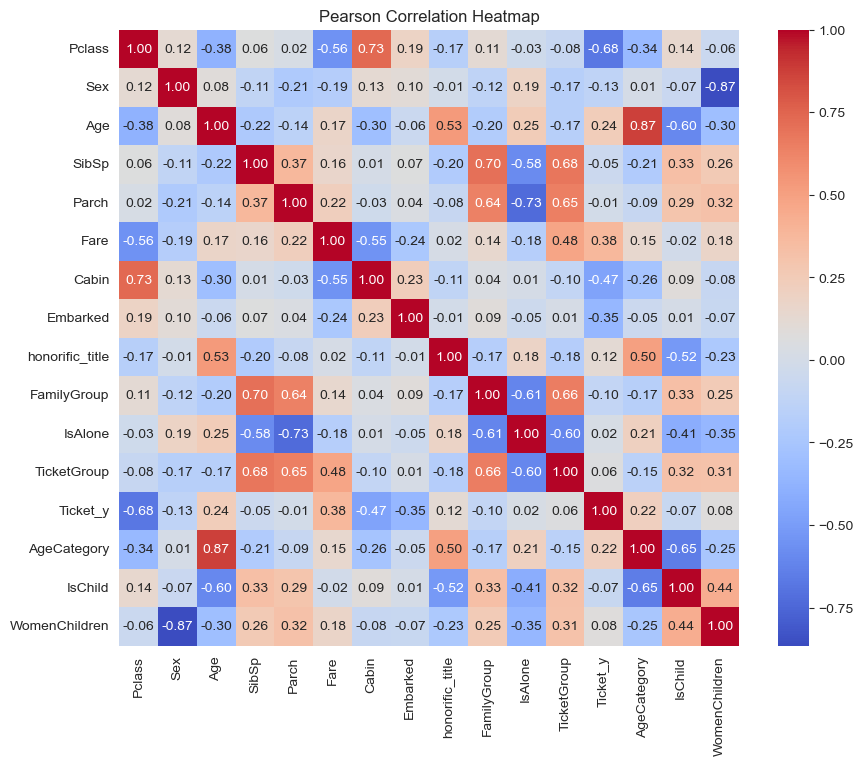

In [133]:
# 피어슨 계수 행렬 시각화
corr_matrix = pd.get_dummies(df).corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

### 데이터프레임 확인

In [134]:
df.head()

Pclass  Sex     Age  SibSp  Parch      Fare  Cabin  Embarked  \
0       3    1  0.2750      1      0  0.014151      8         2   
1       1    0  0.4750      1      0  0.139136      2         0   
2       3    0  0.3250      0      0  0.015469      8         2   
3       1    0  0.4375      1      0  0.103644      2         2   
4       3    1  0.4375      0      0  0.015713      8         2   

   honorific_title  FamilyGroup  IsAlone  TicketGroup  Ticket_y  AgeCategory  \
0                2            2        1            1         1            2   
1                3            2        1            2        16            3   
2                1            1        1            1        11            2   
3                3            2        1            2        15            2   
4                2            2        1            1         5            2   

   IsChild  WomenChildren  
0        0              0  
1        0              1  
2        0              1  
3        0              1  
4        0              0

# RandomForestClassifier Training 🏋️‍♂️🌲

## 학습데이터의 데이터와 답 분리

In [135]:
train_set = df.iloc[:891,]
test_set = df.iloc[891:,]

In [136]:
# 학습데이터의 데이터와 답 분리
X_train = train_set
y_train = df_train['Survived']

# 테스트데이터 생성
X_test = test_set

In [137]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 주입
params = {
      'n_estimators' : [100,200,300]
    , 'max_depth' : [4,8,12]
    , 'min_samples_leaf' : [3,6,12]
    , 'min_samples_split' : [3,6,9]
}
# RF 모델 생성
rf_clf = RandomForestClassifier(
      random_state=42
    , n_jobs=-1
)
# GridSearchCV 학습
grid_cv = GridSearchCV(
  rf_clf
  , param_grid=params
  , cv=5
  , n_jobs=-1
)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_leaf': [3, 6, 12],
                         'min_samples_split': [3, 6, 9],
                         'n_estimators': [100, 200, 300]})

In [138]:
best_params = grid_cv.best_params_

print('RandomForestClassifier Best Params: ', grid_cv.best_params_)
print()
print('RandomForestClassifier Best Score: ',grid_cv.best_score_)

RandomForestClassifier Best Params:  {'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}

RandomForestClassifier Best Score:  0.8372795179210344


# Submission File 🏆🎯

In [139]:
# 위에서 찾은 최적의 hyperparameters set을 이용한 최고의 모델 생성
best_params = grid_cv.best_params_
rf_clf = RandomForestClassifier(
      n_estimators=best_params['n_estimators']
    , max_depth=best_params['max_depth']
    , min_samples_leaf=best_params['min_samples_leaf']
    , min_samples_split=best_params['min_samples_split']
    , random_state=42
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

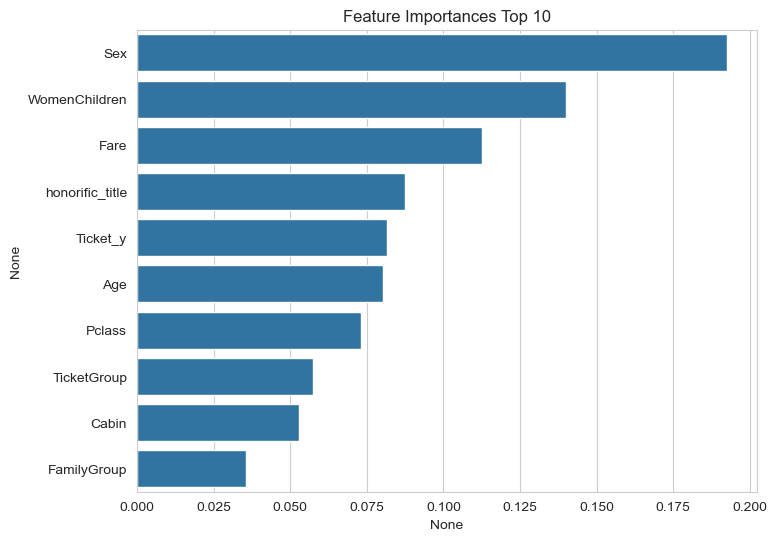

In [140]:
# 피쳐 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns

series = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
top10 = series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 10')
sns.barplot(x=top10, y=top10.index)
plt.show()

In [141]:
# 테스트데이터 넣어서 예측
pred = rf_clf.predict(X_test)

In [142]:
# 제출파일 준비: PassengerId - Survived
submission = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : pred
})

submission['Survived'] = submission['Survived'].astype(int)

In [143]:
# 제출파일 저장
submission.to_csv('submission.csv', index=False)
print('your submission file is saved!')

your submission file is saved!


## 채점하기

In [144]:
# 생성된 데이터 파일과 솔루션 불러오기
# 파일 경로 적절히 수정해서 쓰세요.
submission = pd.read_csv('./submission.csv')
solution = pd.read_csv('./solution.csv')

In [145]:
# 채점 테이블 생성
marking = submission.merge(solution, on='PassengerId')
marking.columns = ['PassengerId', 'Submission', 'Solution']

# 'Check' : 맞으면 1, 틀리면 0
marking['Check'] = 0

In [146]:
# 채점
cond = marking['Submission'] == marking['Solution']
marking.loc[cond, 'Check'] = 1

# 정답 계산 및 출력
result = marking['Check'].sum() / marking.shape[0]
print('정답: {0:.5f}'.format(result))

정답: 0.78469
